<a href="https://colab.research.google.com/github/livio-24/LoanEligibilityPrediction/blob/main/LoanEligibilityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRERIE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# COLLEZIONE DATI

In [2]:
url = "https://raw.githubusercontent.com/livio-24/LoanEligibilityPrediction/main/dataset.csv"

#caricamento dataset in un pandas dataframe
dataset = pd.read_csv(url)

# EXPLORATORY DATA ANALYSIS

In [3]:
#prime 5 righe
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#numero righe e colonne
dataset.shape

(614, 13)

In [5]:
dataset.describe()
#misure statistiche

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#info sulle colonne
#5 variabili numeriche e 8 variabili categoriche
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Distribuzione variabile target
dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
# numero di valori mancanti in ogni colonna
# verranno gestiti successivamente nella fase di data cleaning
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
dataset.drop(columns='Loan_ID', axis = 1, inplace=True)

In [10]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**DATA VISUALIZATION - ANALISI UNIVARIATA**

VARIABILI CATEGORICHE

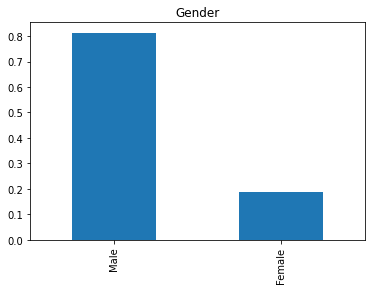

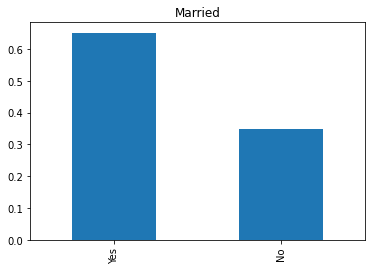

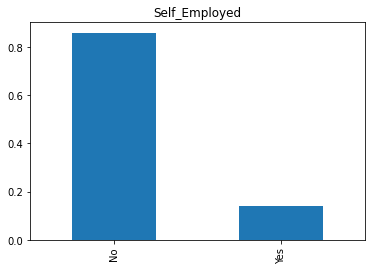

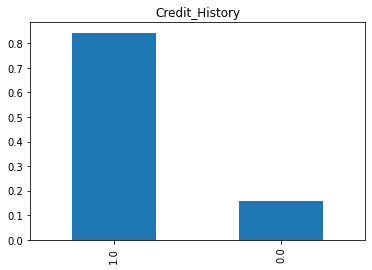

In [11]:
#visualizzazione valori variabili catagoriche in percentuale
dataset['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

Risultati:
- 80% dei candidati nel dataset è maschio
- Circa il 65% dei candidati nel dataset è sposato/a
- Circa il 15% lavora in proprio
- Circa l'85% ha ripagato i propri debiti

VARIABILI ORDINALI

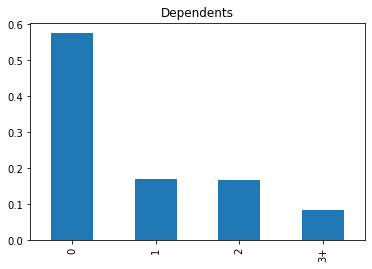

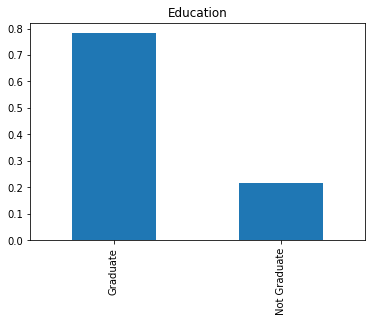

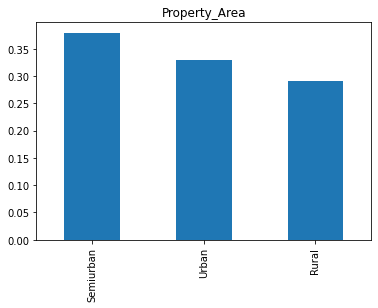

In [12]:
#visualizzazione valori variabili ordinali in percentuale
dataset['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
dataset['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Risultati:
- La maggior parte dei candidati non ha familiari dipendenti
- Circa l'80% dei candidati ha una laurea
- La maggior parte dei candidati vive in un'area semiurbana

VARIABILI NUMERICHE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


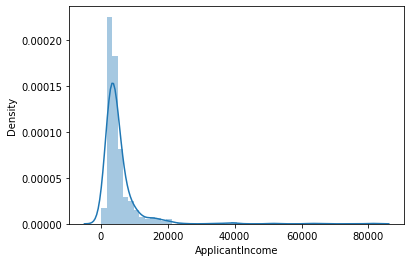

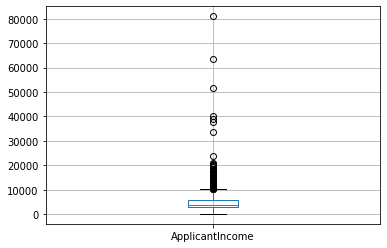

In [13]:
#visualizzazione distribuzione variabile 'ApplicantIncome'
sns.distplot(dataset['ApplicantIncome'])
plt.show()
#boxplot per individuazione outliers
dataset.boxplot(['ApplicantIncome'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


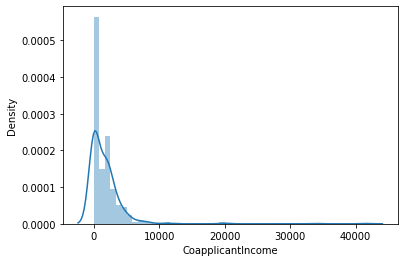

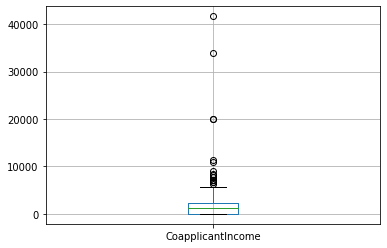

In [14]:
#visualizzazione distribuzione variabile 'CoapplicantIncome'
sns.distplot(dataset['CoapplicantIncome'])
plt.show()
#boxplot per individuazione outliers
dataset.boxplot(['CoapplicantIncome'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


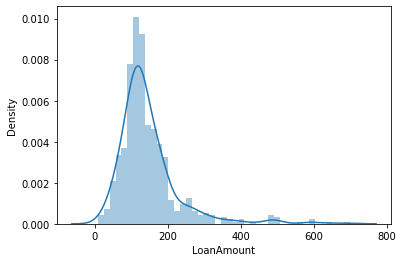

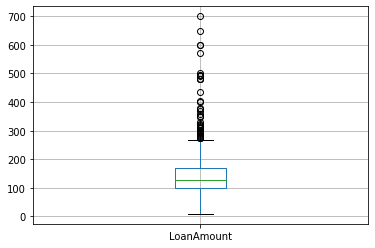

In [15]:
#visualizzazione distribuzione variabile 'LoanAmount'
sns.distplot(dataset['LoanAmount'])
plt.show()
dataset.boxplot(['LoanAmount'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


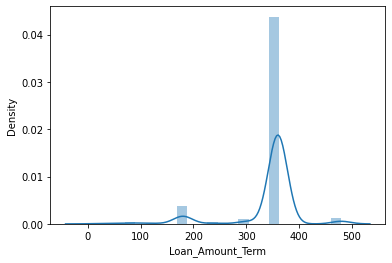

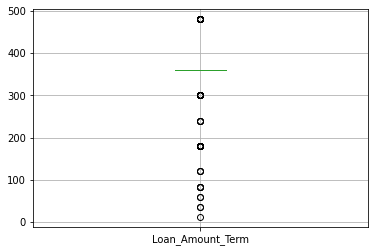

In [16]:
#visualizzazione distribuzione variabile 'Loan_Amount_Term'
sns.distplot(dataset['Loan_Amount_Term'])
plt.show()
dataset.boxplot(['Loan_Amount_Term'])
plt.show()

La maggior parte delle features numeriche ha degli outliers

**Matrice di correlazione**

In [17]:
correlation_matrix = dataset.corr()

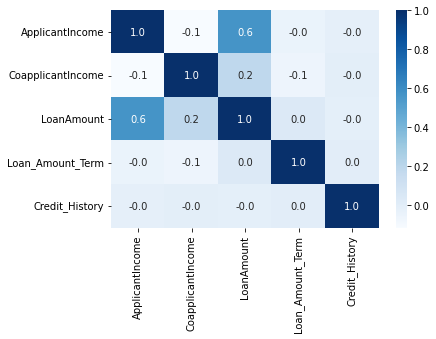

In [18]:
# heat map per visualizzare matrice di correlazione
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

Non ci sono molte variabili correlate tra di loro, le uniche due sono ApplicantIncome - LoanAmount

In [19]:
#conversione variabili categoriche in numeriche
dataset.replace({'Gender':{'Male':0, 'Female':1}, 'Married' :{'No':0, 'Yes':1}, 'Education':{'Not Graduate':0, 'Graduate':1}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Urban':1, 'Semiurban':2}, 'Loan_Status':{'N':0, 'Y':1}}, inplace = True)


# replacing the value of 3+ to 4
dataset = dataset.replace(to_replace='3+', value=4)

dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


# DATA CLEANING

In [20]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#Sostituiamo i valori mancanti con la moda per le variabili categoriche
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

#Nella variabile Loan_Amount_Term possiamo notare che 360 è il valore che si ripete di più, quindi utilizziamo la moda
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

#Utilizziamo la mediana poiché la variabile ha degli outliers, quindi non è un buon approccio utilizzare la media
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)

In [22]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# SPLIT DATASET

In [23]:
#definizione variabili dipendenti e indipendenti

x = dataset.drop('Loan_Status', axis = 1)
y = dataset['Loan_Status']

In [24]:
#split dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)


X_train dataset:  (491, 11)
y_train dataset:  (491,)
X_test dataset:  (123, 11)
y_test dataset:  (123,)


# DATA SCALING

In [25]:
#Normalizzazione
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#z-score
#scaler = StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

df = pd.DataFrame(X_train, columns = x.columns)

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.00,1.0,0.0,0.034892,0.066983,0.228426,0.743590,1.0,1.0
1,0.0,1.0,0.00,1.0,0.0,0.046716,0.019200,0.174281,0.743590,1.0,1.0
2,0.0,1.0,0.50,1.0,1.0,0.113457,0.188950,0.627750,0.615385,1.0,0.0
3,0.0,0.0,0.25,1.0,1.0,0.056178,0.000000,0.164129,0.743590,1.0,0.0
4,0.0,1.0,0.50,0.0,0.0,0.046592,0.000000,0.194585,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
486,1.0,0.0,0.00,0.0,1.0,0.222820,0.000000,0.196277,0.743590,1.0,0.5
487,0.0,1.0,0.25,1.0,0.0,0.032616,0.046008,0.231810,0.743590,0.0,0.0
488,1.0,0.0,0.00,0.0,1.0,0.211664,0.000000,0.365482,0.743590,1.0,1.0
489,0.0,1.0,0.25,0.0,0.0,0.063513,0.034320,0.257191,0.743590,0.0,1.0


# FEATURE SELECTION

Analizziamo la correlazione delle nostre feature con la variabile dipendente 
attraverso un istogramma

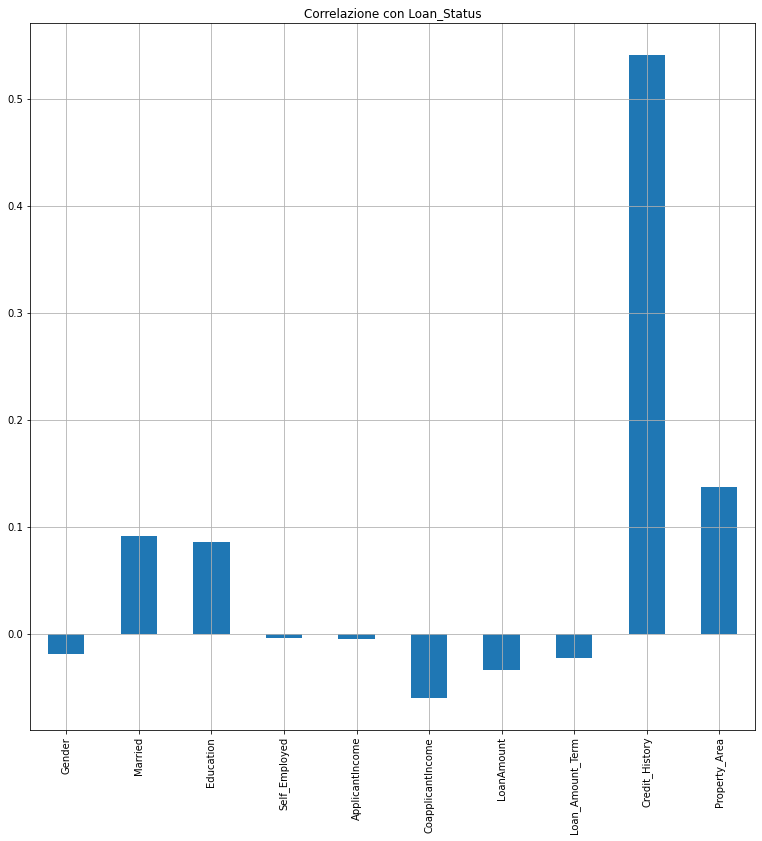

In [31]:
#Creaiamo un dataframe senza il target
df_without_target = dataset.drop('Loan_Status', axis=1)

#Otteniamo la correlazione a coppie con il target
df_with_correlation = df_without_target.corrwith(dataset.Loan_Status)

#Creiamo un istogramma con la correlazione dei dati con il nostro target (Loan_Status)
df_with_correlation.plot(kind='bar', grid=True,figsize=(13, 13), title="Correlazione con Loan_Status")

# DATA BALANCING

In [35]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#from imblearn.under_sampling import RandomUnderSampler

#print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
#print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

#sm = RandomUnderSampler(random_state=42)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Before OverSampling, counts of label '1': 338
Before OverSampling, counts of label '0': 153 



In [36]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 338
After OverSampling, counts of label '0': 338


# COSTRUZIONE MODELLI

**LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


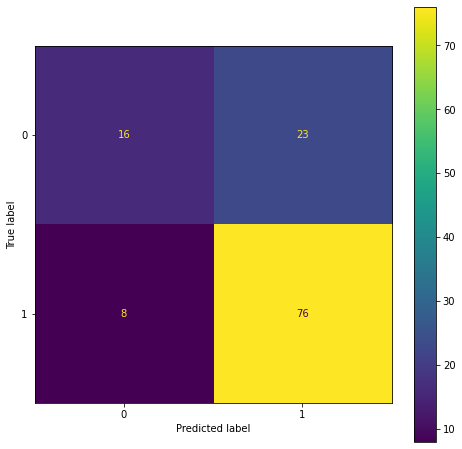

              precision    recall  f1-score   support

           0       0.67      0.41      0.51        39
           1       0.77      0.90      0.83        84

    accuracy                           0.75       123
   macro avg       0.72      0.66      0.67       123
weighted avg       0.74      0.75      0.73       123

Accuracy: 0.7479674796747967


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

y_pred = logisticRegr.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(logisticRegr, X_test, y_test, ax=ax)  
plt.show()

#print(confusion_matrix(y_test, predictions))

#Risultati ottenuti
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**DECISION TREE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


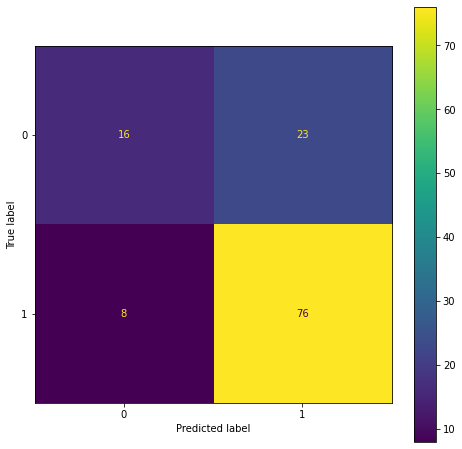

              precision    recall  f1-score   support

           0       0.40      0.44      0.41        39
           1       0.72      0.69      0.71        84

    accuracy                           0.61       123
   macro avg       0.56      0.56      0.56       123
weighted avg       0.62      0.61      0.61       123

Accuracy: 0.6097560975609756


In [48]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier( random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

labels = np.unique(y_test)
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(logisticRegr, X_test, y_test, ax=ax)  
plt.show()

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**NAYVE BAYES**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


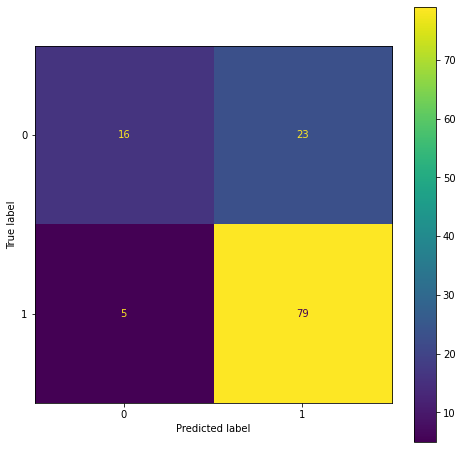

              precision    recall  f1-score   support

           0       0.76      0.41      0.53        39
           1       0.77      0.94      0.85        84

    accuracy                           0.77       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.77      0.77      0.75       123

Accuracy: 0.7723577235772358


In [44]:
from sklearn.naive_bayes import  GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)
labels = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(NB, X_test, y_test, ax=ax)  
plt.show()

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**RANDOM FOREST**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


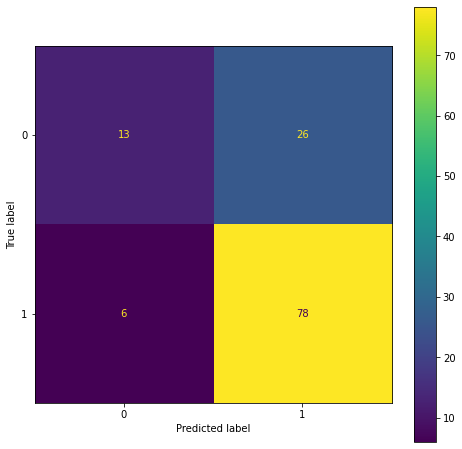

              precision    recall  f1-score   support

           0       0.68      0.33      0.45        39
           1       0.75      0.93      0.83        84

    accuracy                           0.74       123
   macro avg       0.72      0.63      0.64       123
weighted avg       0.73      0.74      0.71       123

Accuracy: 0.7398373983739838


In [45]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)

labels = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(RandomForest, X_test, y_test, ax=ax)  
plt.show()

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))